In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as imread
import pandas as pd
import seaborn as sns
from sklearn.datasets._samples_generator import (make_blobs,
                                                 make_circles,
                                                 make_moons)
from sklearn.cluster import KMeans, spectral_clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline


In [6]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 4.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


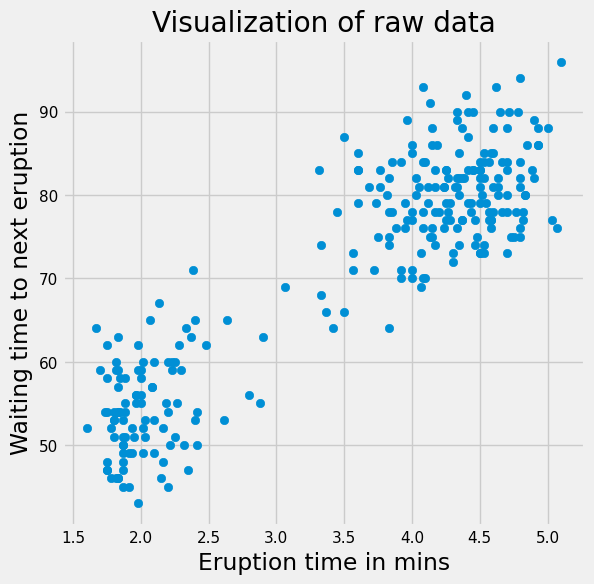

In [16]:
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')
df = pd.read_csv('/Users/xuanloc/Downloads/Regression-Analysis-of-Old-Faithful-main/faithful.csv')

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

In [21]:
X_std = StandardScaler().fit_transform(df)
X_std
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.cluster_centers_
centroids

array([[-1.26008539, -1.20156744],
       [ 0.70970327,  0.67674488]])

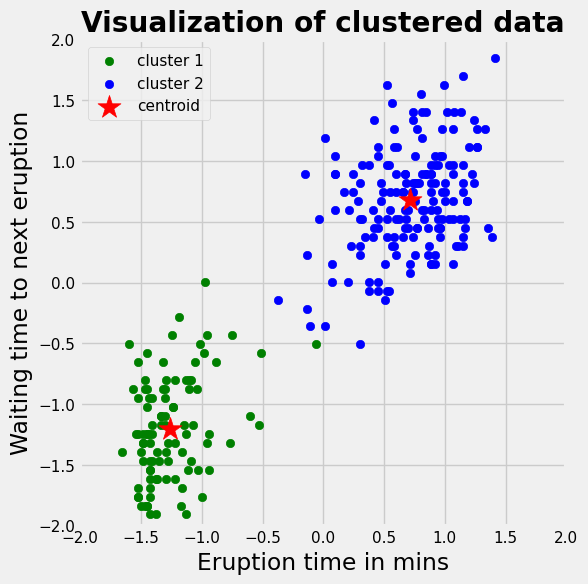

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

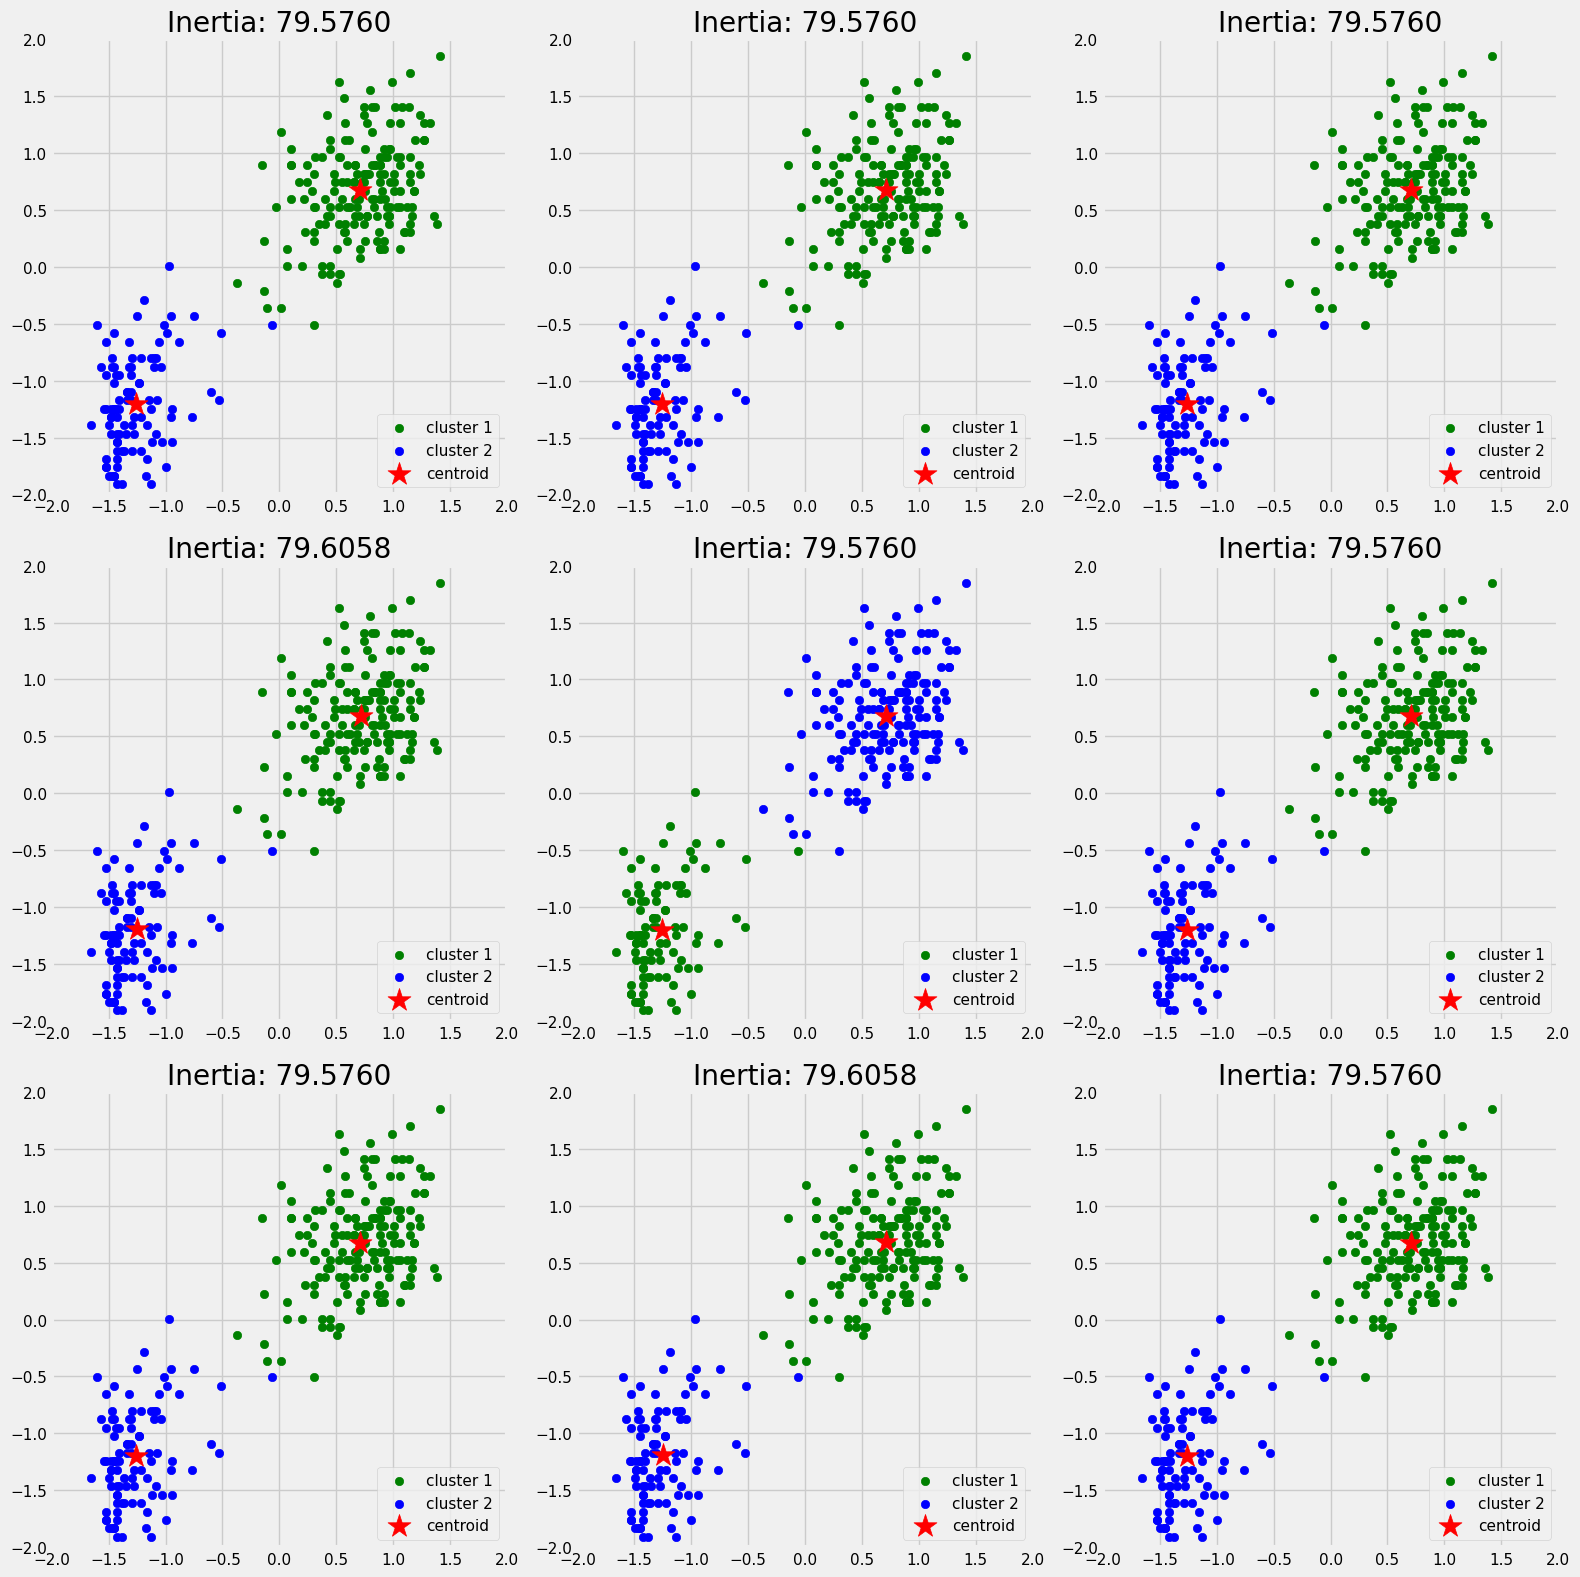

In [34]:
import numpy as np
X1_std = StandardScaler().fit_transform(df)

n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = KMeans(n_clusters=2, max_iter=3, random_state=np.random.randint(0, 1000))
    km.fit(X1_std)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(X1_std[km.labels_ == 0, 0], X1_std[km.labels_ == 0, 1], c='green', label='cluster 1')
    ax[i].scatter(X1_std[km.labels_ == 1, 0], X1_std[km.labels_ == 1, 1], c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1], c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'Inertia: {km.inertia_:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout()
plt.show()